In [1]:
import sys
sys.path.insert(0,'/Users/walfits/Repositories/Aglaia/')
import extract
import Neural_net_2 as nn
import numpy as np
from sklearn import model_selection as modsel

In [2]:
coord_xyz, ene, forces = extract.load_data("/Users/walfits/Documents/aspirin/", n_samples=10000)
mean_ene = np.mean(ene)
std_ene = np.std(ene)

ene = (ene-mean_ene)/std_ene
forces = forces/std_ene
ene_force = np.concatenate((np.reshape(ene, (len(ene), 1)), forces), axis=1)

In [3]:
X_train, X_test, y_train, y_test = modsel.train_test_split(coord_xyz, ene_force, test_size=0.2)

In [4]:
estimator = nn.MLPRegFlow()

In [5]:
estimator.load_NN("Models/model_01/")

INFO:tensorflow:Restoring parameters from Models/model_01/


In [6]:
ene_forces_pred = estimator.predict(X_test)

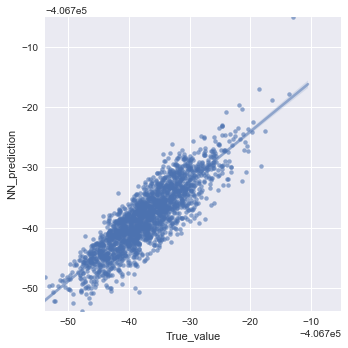

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
df["NN_prediction"] = (ene_forces_pred[:, 0]*std_ene)+mean_ene
df["True_value"] = (y_test[:, 0]*std_ene)+mean_ene
# max_df = df.max()
# min_df = df.min()
# print(max_df, min_df)
sns.set()
lm = sns.lmplot('True_value', 'NN_prediction', data=df, scatter_kws={"s": 20, "alpha": 0.6}, line_kws={"alpha": 0.5})
lm.set(ylim=[-406753.800, -406705.0])
lm.set(xlim=[-406753.800, -406705.0])
plt.show()

In [8]:
estimator.score(X_test, y_test)

0.65065895562992471